# Import Libraries

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [207]:
df = pd.read_csv('Train.csv')
df.sample(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
9501,9502,B,Ship,4,2,171,3,medium,M,4,5859,0
6232,6233,C,Ship,3,3,146,3,medium,F,4,5384,0
5565,5566,B,Ship,4,1,173,2,medium,F,8,4893,0
5648,5649,A,Ship,3,3,232,4,low,F,4,4662,1
10170,10171,D,Ship,5,2,208,8,medium,M,5,4751,0
4201,4202,F,Ship,4,4,270,2,low,F,1,5148,1
7690,7691,C,Ship,4,4,140,8,medium,F,2,5481,0
8301,8302,B,Ship,5,3,226,2,high,F,2,4219,0
7859,7860,F,Ship,5,2,189,2,medium,M,2,4636,1
8248,8249,C,Ship,3,4,209,2,high,M,10,4540,0


In [208]:
# Rename column
df = df.rename(columns={'Warehouse_block':'Warehouse','Mode_of_Shipment':'Shipment','Customer_care_calls':'Calls',
                        'Customer_rating':'Rating','Cost_of_the_Product':'Cost','Product_importance':'Importance',
                        'Discount_offered':'Discount','Weight_in_gms':'Weight_gram','Reached.on.Time_Y.N':'Late'})
df.head()

,ID,Warehouse,Shipment,Calls,Rating,Cost,Prior_purchases,Importance,Gender,Discount,Weight_gram,Late
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [209]:
# informasi general tentang dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               10999 non-null  int64 
 1   Warehouse        10999 non-null  object
 2   Shipment         10999 non-null  object
 3   Calls            10999 non-null  int64 
 4   Rating           10999 non-null  int64 
 5   Cost             10999 non-null  int64 
 6   Prior_purchases  10999 non-null  int64 
 7   Importance       10999 non-null  object
 8   Gender           10999 non-null  object
 9   Discount         10999 non-null  int64 
 10  Weight_gram      10999 non-null  int64 
 11  Late             10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


Pengamatan:
1. Data terdiri dari 10999 baris
2. Tampak tidak terdapat kolom yang memiliki null/missing values (Non-Null Count pada setiap kolom bernilai 10999)
3. Sepertinya tidak ada issue yang mencolok pada tipe data untuk setiap kolom (sudah sesuai)

# Statistical Summary

In [210]:
df.describe()

,ID,Calls,Rating,Cost,Prior_purchases,Discount,Weight_gram,Late
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


Beberapa pengamatan:
1. Kolom `Calls` dan `Rating` tampak sudah cukup simetrik distribusinya (mean dan median tak berbeda jauh)
2. Kolom `Discount` tampaknya skew ke kanan (long-right tail), mungkin dapat dilakukan transformasi nantinya
3. Kolom `Late` merupakan target dan ternyata bernilai boolean (kategorikal)

# 1. Data Cleansing

## A. Handle Missing Values

In [211]:
# jumlah entry NULL di setiap kolom
df.isna().sum()

ID                 0
Warehouse          0
Shipment           0
Calls              0
Rating             0
Cost               0
Prior_purchases    0
Importance         0
Gender             0
Discount           0
Weight_gram        0
Late               0
dtype: int64

Tidak terdapat missing values pada setiap kolom.

## B. Handle Duplicated Data

In [212]:
# cek jumlah duplicated rows dari semua kolom
df.duplicated().sum()

0

Tidak terdapat duplicated data pada dataset.

## C. Feature Transformation & Handle Outliers

### Log transformation

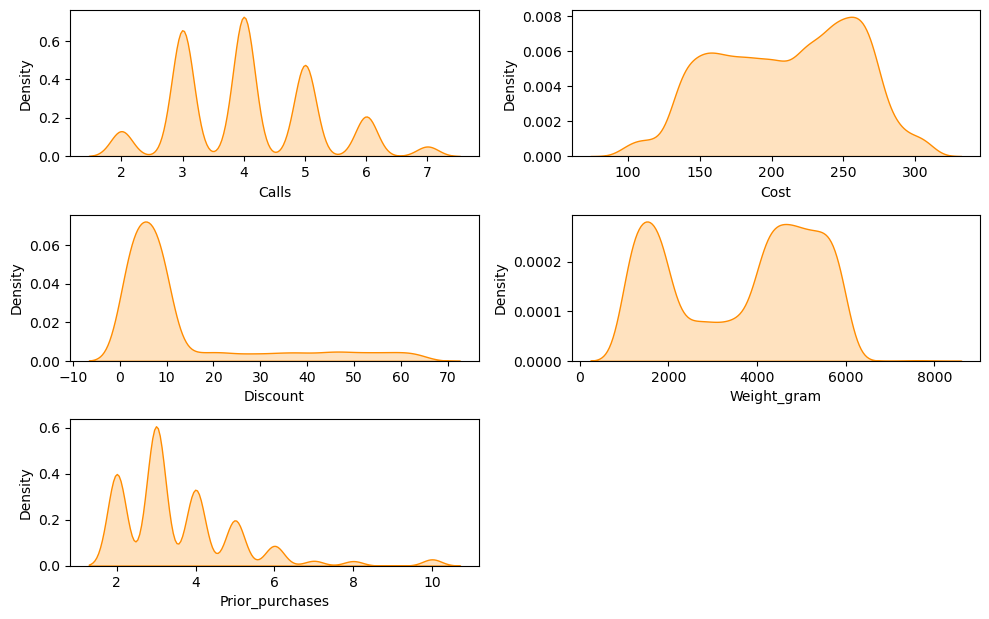

In [213]:
# melihat distribusi data numerical

plt.figure(figsize=(10,12))
for i in range(0, len(['Calls','Cost','Discount','Weight_gram','Prior_purchases'])):
    plt.subplot(6,2, i+1)
    sns.kdeplot(data=df, x=df[['Calls','Cost','Discount','Weight_gram','Prior_purchases'][i]], color='darkorange', fill='True')
    plt.tight_layout()

In [214]:
# cek nilai skewness feature discount dan prior_purchase sebelum transformasi

print('skewness fitur discount: ', round(df['Discount'].skew(axis=0, skipna=True),3))
print('skewness fitur prior_purchase: ', round(df['Prior_purchases'].skew(axis=0, skipna=True),3))

skewness fitur discount:  1.799
skewness fitur prior_purchase:  1.682


Sebelum melakukan penghapusan outliers, log transformation dilakukan pada fitur discount dan prior_purchase yang memiliki distribusi postively skewed

In [215]:
# melakuka transformasi

df['log_discount'] = np.log(df['Discount'])
df['log_prior_purchases'] = np.log(df['Prior_purchases'])

In [216]:
# cek nilai skewness log discount dan prior purchase

print('skewness fitur log_discount:', round(df['log_discount'].skew(axis=0, skipna=True),3))
print('skewness fitur log_prior_purchase:', round(df['log_prior_purchases'].skew(axis=0, skipna=True),3))

skewness fitur log_discount: 0.218
skewness fitur log_prior_purchase: 0.463


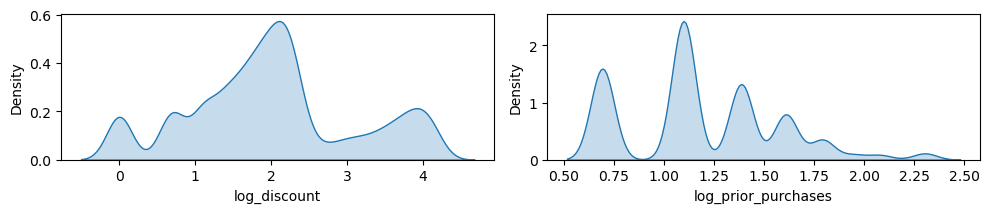

In [217]:
plt.figure(figsize=(10,12))
for i in range(0, len(['log_discount','log_prior_purchases'])):
    plt.subplot(6,2, i+1)
    sns.kdeplot(data=df, x=df[['log_discount','log_prior_purchases'][i]], fill='True')
    plt.tight_layout()

### Pengecekan Z-Score

Melakukan pengecekan Z-Score pada setiap fitur numerik dilakukan untuk acuan penghapusan outliers

In [218]:
from scipy import stats

In [219]:
# Remove outlier Z-Score pada feature log_discount

print(f'Jumlah baris sebelum filtering outlier: {len(df)}')

zscore = abs(stats.zscore(df['log_discount'])) # absolute z-scorenya
filtered_entries = (zscore < 3) # keep kurang dari 3 absolute z-scorenya
df = df[filtered_entries] # filter, ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah filtering outlier: {len(df)}')
print('Tidak terdapat data dengan nilai Z-Score > 3, sehingga tidak ada penghapusan data outliers')

Jumlah baris sebelum filtering outlier: 10999
Jumlah baris setelah filtering outlier: 10999
Tidak terdapat data dengan nilai Z-Score > 3, sehingga tidak ada penghapusan data outliers


In [220]:
# Remove outlier Z-Score pada feature log_prior_purchases

print(f'Jumlah baris sebelum filtering outlier: {len(df)}')

zscore = abs(stats.zscore(df['log_prior_purchases'])) # absolute z-scorenya
filtered_entries = (zscore < 3) # keep kurang dari 3 absolute z-scorenya
df = df[filtered_entries] # filter, ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah filtering outlier: {len(df)}')
print('Tidak terdapat data dengan nilai Z-Score > 3, sehingga tidak ada penghapusan data outliers')

Jumlah baris sebelum filtering outlier: 10999
Jumlah baris setelah filtering outlier: 10999
Tidak terdapat data dengan nilai Z-Score > 3, sehingga tidak ada penghapusan data outliers


In [221]:
# Remove outlier Z-Score pada feature Calls

print(f'Jumlah baris sebelum filtering outlier: {len(df)}')

zscore = abs(stats.zscore(df['Calls'])) # absolute z-scorenya
filtered_entries = (zscore < 3) # keep kurang dari 3 absolute z-scorenya
df = df[filtered_entries] # filter, ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah filtering outlier: {len(df)}')
print('Tidak terdapat data dengan nilai Z-Score > 3, sehingga tidak ada penghapusan data outliers')

Jumlah baris sebelum filtering outlier: 10999
Jumlah baris setelah filtering outlier: 10999
Tidak terdapat data dengan nilai Z-Score > 3, sehingga tidak ada penghapusan data outliers


In [222]:
# Remove outlier Z-Score pada feature Cost

print(f'Jumlah baris sebelum filtering outlier: {len(df)}')

zscore = abs(stats.zscore(df['Cost'])) # absolute z-scorenya
filtered_entries = (zscore < 3) # keep kurang dari 3 absolute z-scorenya
df = df[filtered_entries] # filter, ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah filtering outlier: {len(df)}')
print('Tidak terdapat data dengan nilai Z-Score > 3, sehingga tidak ada penghapusan data outliers')

Jumlah baris sebelum filtering outlier: 10999
Jumlah baris setelah filtering outlier: 10999
Tidak terdapat data dengan nilai Z-Score > 3, sehingga tidak ada penghapusan data outliers


In [194]:
# Remove outlier Z-Score pada feature Weight_gram

print(f'Jumlah baris sebelum filtering outlier: {len(df)}')

zscore = abs(stats.zscore(df['Weight_gram'])) # absolute z-scorenya
filtered_entries = (zscore < 3) # keep kurang dari 3 absolute z-scorenya
df = df[filtered_entries] # filter, ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah filtering outlier: {len(df)}')
print('Tidak terdapat data dengan nilai Z-Score > 3, sehingga tidak ada penghapusan data outliers')

Jumlah baris sebelum filtering outlier: 10999
Jumlah baris setelah filtering outlier: 10999
Tidak terdapat data dengan nilai Z-Score > 3, sehingga tidak ada penghapusan data outliers


### Normalization (Scaling)

Normalization dilakukan pada fitur numerik

In [223]:
from sklearn.preprocessing import MinMaxScaler

# Normalization pada feature numerik

df['Norm_Calls'] = MinMaxScaler().fit_transform(df['Calls'].values.reshape(len(df), 1))
df['Norm_Cost'] = MinMaxScaler().fit_transform(df['Cost'].values.reshape(len(df), 1))
df['Norm_Disc'] = MinMaxScaler().fit_transform(df['log_discount'].values.reshape(len(df), 1))
df['Norm_Weight_gram'] = MinMaxScaler().fit_transform(df['Weight_gram'].values.reshape(len(df), 1))
df['Norm_Prior_Purchases'] = MinMaxScaler().fit_transform(df['log_prior_purchases'].values.reshape(len(df), 1))

In [224]:
df[['Norm_Calls', 'Norm_Cost', 'Norm_Disc', 'Norm_Weight_gram', 'Norm_Prior_Purchases']].describe()

,Norm_Calls,Norm_Cost,Norm_Disc,Norm_Weight_gram,Norm_Prior_Purchases
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,0.410892,0.533630,0.478734,0.384663,0.312234
std,0.228298,0.224595,0.259605,0.238916,0.235964
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.341121,0.332095,0.122498,0.251930
50%,0.400000,0.551402,0.466155,0.459898,0.251930
75%,0.600000,0.724299,0.551598,0.591527,0.430677
max,1.000000,1.000000,1.000000,1.000000,1.000000


Nilai min dan max sudah bernila 0 dan 1 pada fitur yang dilakukan normalization

## D. Feature Encoding

### One Hot Encoding

one hot encoding dilakukan pada feature Warehouse dan Shipment (feature kategorikal yang tidak bersifat ordinal)

In [225]:
# one hot encoding pada feature Warehouse dan Shipment 

for cat in ['Warehouse', 'Shipment']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

Melakukan penghapusan fitur Warehouse dan Shipment karena sudah dilakukan one hot encoding

In [226]:
# penghapusan fitur Warehouse, dan Shipment 

df.drop(columns=['Warehouse', 'Shipment' ], inplace=True)

### Label Encoding

label encoding dilakukan pada feature Gender dan Product Importance (feature kategorikal yang ordinal)

In [227]:
# label encoding pada feature gender dan Product Importance

# mapping feature gender
mapping_Gender = {
    'F' : 0,
    'M' : 1
}

# mapping feature product importance
mapping_Importance = {
    'low' : 0,
    'medium' : 1,
    'high' : 2,
}

# replace kolom gender yang telah dikuantifikasi di dataset
df['Gender'] = df['Gender'].map(mapping_Gender)
df['Importance'] = df['Importance'].map(mapping_Importance)

df

,ID,Calls,Rating,Cost,Prior_purchases,Importance,Gender,Discount,Weight_gram,Late,...,Norm_Weight_gram,Norm_Prior_Purchases,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,Shipment_Flight,Shipment_Road,Shipment_Ship
0,1,4,2,177,3,0,0,44,1233,1,...,0.033893,0.251930,0,0,0,1,0,1,0,0
1,2,4,5,216,2,0,1,59,3088,1,...,0.304894,0.000000,0,0,0,0,1,1,0,0
2,3,2,2,183,4,0,1,48,3374,1,...,0.346676,0.430677,1,0,0,0,0,1,0,0
3,4,3,3,176,4,1,1,10,1177,1,...,0.025712,0.430677,0,1,0,0,0,1,0,0
4,5,2,2,184,3,1,0,46,2484,1,...,0.216654,0.251930,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,4,1,252,5,1,0,1,1538,1,...,0.078451,0.569323,1,0,0,0,0,0,0,1
10995,10996,4,1,232,5,1,0,6,1247,0,...,0.035939,0.569323,0,1,0,0,0,0,0,1
10996,10997,5,4,242,5,0,0,4,1155,0,...,0.022498,0.569323,0,0,1,0,0,0,0,1
10997,10998,5,2,223,6,1,1,2,1210,0,...,0.030533,0.682606,0,0,0,0,1,0,0,1


## E. Handle Class Imbalance

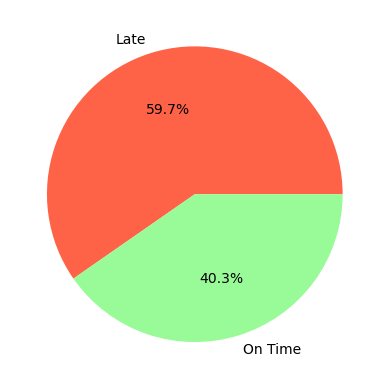

In [228]:
#plotting piechart

#creating the data for pie chart
total_late=df['Late'].sum()
total_on_time= df['Late'].value_counts().sum()-total_late

#draw the pie chart
late_pie=np.array([total_late,total_on_time])
plt.pie(late_pie,labels=['Late','On Time'],colors=['tomato','palegreen'],autopct='%1.1f%%')
plt.show()

In [229]:
#cek ratio jumlah nilai target

df_late = df.groupby('Late').agg({'ID':'count'}).reset_index().rename(columns={'ID':'Jumlah'})
df_late['Ratio'] = round(df_late['Jumlah']*100/df_late['Jumlah'].sum(),3)
df_late

,Late,Jumlah,Ratio
0,0,4436,40.331
1,1,6563,59.669


Handle class imbalance tidak perlu dilakukan karena proporsi kelas minoritas di atas 40% 

# 2. Feature Engineering

## A. Feature Selection

<AxesSubplot:>

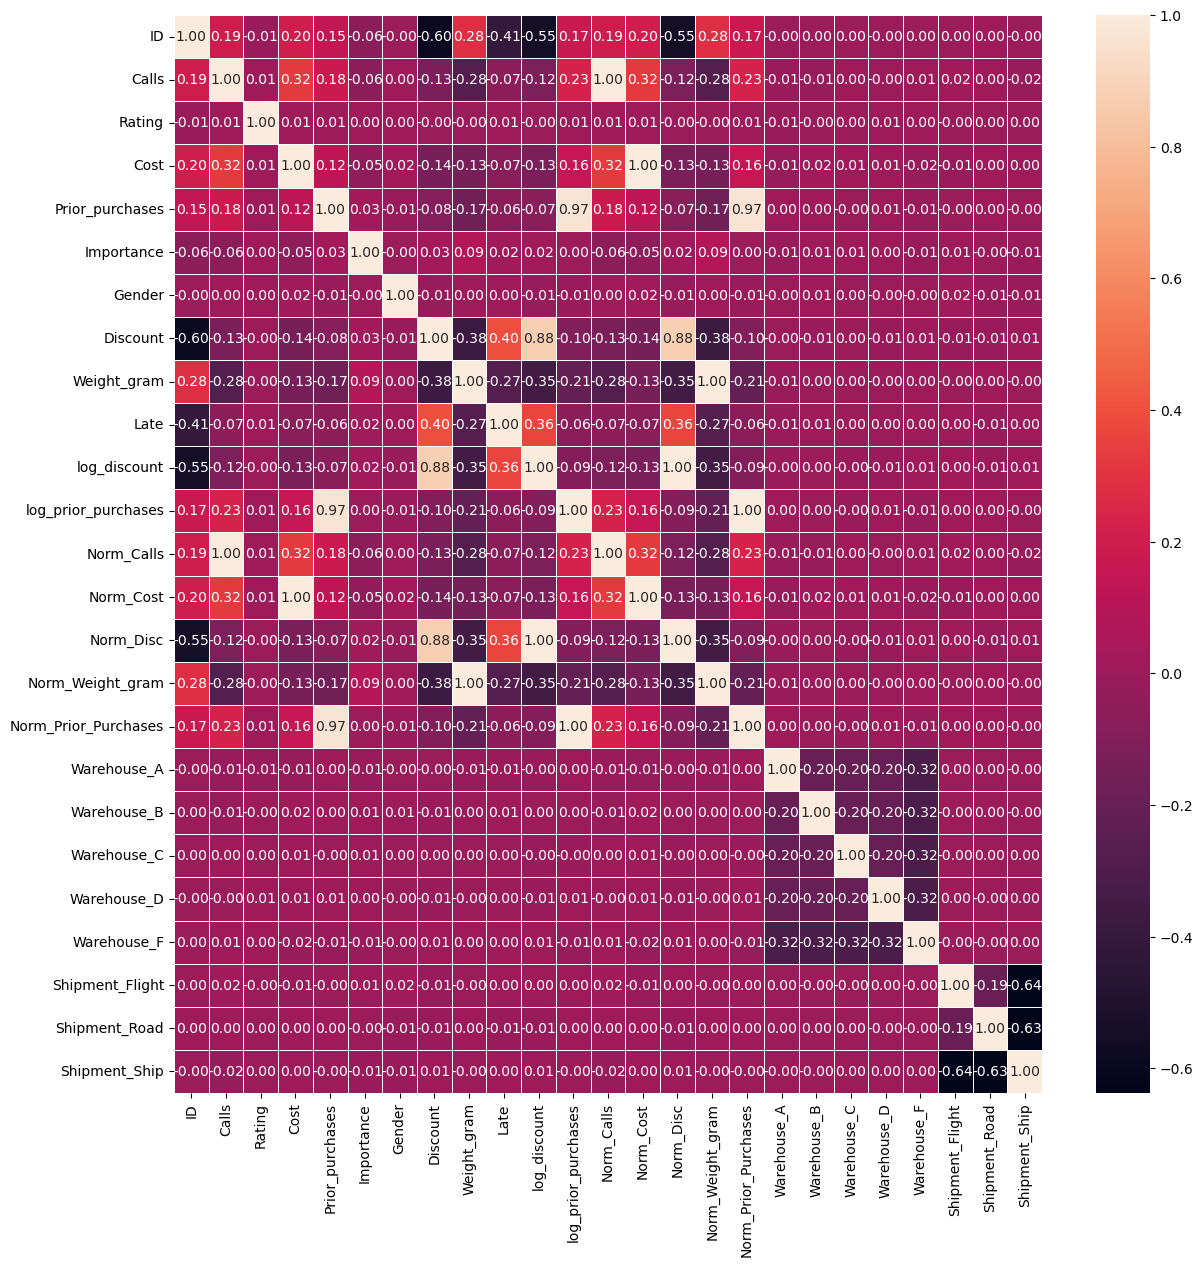

In [230]:
# heat map for Pearson's correlation
heatmap_correlation,ax=plt.subplots(figsize = (14,14))
sns.heatmap(df.corr(),annot= True,linewidths=0.5,fmt = ".2f",ax=ax)

Feature selection berdasarkan Heatmap plot:

1. Fitur ID dihapuskan karena tidak memiliki makna penting pada saat pemodelan
2. Berdasarkan plot heatmap diatas, tidak ada korelasi anatar fitur yang bernilai >0.7, sehingga tidak perlu dilakukan penghapusan fitur redundan 

In [231]:
# penghapusan kolom ID

df.drop(columns=['ID'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10999 entries, 0 to 10998
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Calls                 10999 non-null  int64  
 1   Rating                10999 non-null  int64  
 2   Cost                  10999 non-null  int64  
 3   Prior_purchases       10999 non-null  int64  
 4   Importance            10999 non-null  int64  
 5   Gender                10999 non-null  int64  
 6   Discount              10999 non-null  int64  
 7   Weight_gram           10999 non-null  int64  
 8   Late                  10999 non-null  int64  
 9   log_discount          10999 non-null  float64
 10  log_prior_purchases   10999 non-null  float64
 11  Norm_Calls            10999 non-null  float64
 12  Norm_Cost             10999 non-null  float64
 13  Norm_Disc             10999 non-null  float64
 14  Norm_Weight_gram      10999 non-null  float64
 15  Norm_Prior_Purchase

## B. Feature Extraction

Feature extraction tidak dilakukan pada dataset ini